In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [67]:
experiment_raw = pd.DataFrame([], columns=['x', 'y', 'experiment', 'location'])

In [68]:
for name in glob.iglob('*.csv'):
    data = pd.read_csv(name, index_col=False)[['x', 'y']]
    name = name.replace('experiment', '')
    name = name.replace('.csv', '')
    name = name.replace('_', ',',1)
    name = name.split(',')
    for _,row in data.iterrows():
        experiment_raw = experiment_raw.append({'x':row['x'], 'y':row['y'], 'experiment':int(name[0]), 'location':name[1]}, ignore_index=True)

**Cleaning the Dataset**

In [69]:
experiment = experiment_raw.dropna()

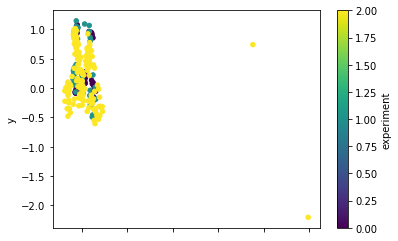

In [70]:
experiment.plot.scatter(x='x', y='y', c='experiment',colormap='viridis')

A few outliers are obstructing our observation.  
A threshold consisting on a 1.5m\*1.5m square is applied to keep the data exploitable.

In [110]:
outliers = (experiment['x'] > 1.5) | (experiment['x'] < -1.5) | (experiment['y'] > 1.5) | (experiment['y'] < -1.5)
experiment[outliers]

,x,y,experiment,location
52,1.522943,-0.057461,0,low_right
106,1.528242,-0.190517,1,low_right
203,-1.606565,-0.350554,2,low_left
205,-1.528964,0.101548,2,low_left
206,-1.867645,-0.048745,2,low_left
207,-1.512740,-0.126131,2,low_left
209,-1.509784,-0.011286,2,low_left
210,-1.763910,-0.000015,2,low_left
212,-1.587911,0.040731,2,low_left
216,-1.527039,-0.479445,2,low_left


We notice that almost all the outliers are captured during the experiment number 2. It is logical, according to the fact that all values are registered and there is no process to smoothen the errors.

In [93]:
experiment_cleaned = experiment[~outliers]

In [130]:
real_values = pd.DataFrame([[-1.105,1.266], [1.105,1.266], [-1.105,0], [1.105,0],[0,0]], index=['high_left', 'high_right',\
                                                                                               'low_left', 'low_right', 'origin'],\
                           columns=['x', 'y'])
real_values

,x,y
high_left,-1.105,1.266
high_right,1.105,1.266
low_left,-1.105,0.000
low_right,1.105,0.000
origin,0.000,0.000


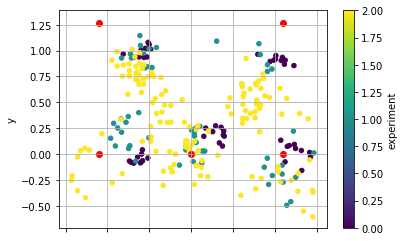

In [131]:
experiment_cleaned.plot.scatter(x='x', y='y', c='experiment',colormap='viridis', grid=True)
plt.scatter(real_values['x'], real_values['y'], color='red')

### Difference between real value and mean

In [120]:
# Experiment 0
mean_0 = experiment_cleaned[experiment_cleaned['experiment'] == 0].groupby('location').mean()

# Experiment 1
mean_1 = experiment_cleaned[experiment_cleaned['experiment'] == 1].groupby('location').mean()

# Experiment 2
mean_2 = experiment_cleaned[experiment_cleaned['experiment'] == 2].groupby('location').mean()

In [133]:
diff_mean_0 = mean_0 - real_values
diff_mean_1 = mean_1 - real_values
diff_mean_2 = mean_2 - real_values

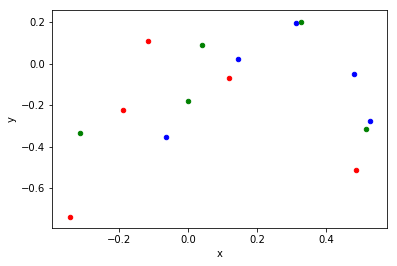

In [146]:
ax0 = diff_mean_0.plot.scatter(x='x', y='y', c='b', grid=True)
diff_mean_1.plot.scatter(x='x', y='y', c='g', ax=ax0)
diff_mean_2.plot.scatter(x='x', y='y', c='r', ax=ax0)

**Mesure of dispersion for each condition**